In [1]:
import numpy as np
import astropy.io.fits
import matplotlib.pyplot as plt
import scipy as sym 
import scipy.integrate as integrate
from scipy import log,exp,sqrt,stats
from astropy import units as u
import astropy.constants as const
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.stats import biweight_location, biweight_scale, bootstrap

from astropy.cosmology import LambdaCDM
from scipy.interpolate import interp1d
cosmos = LambdaCDM(H0=67.77* u.km / u.Mpc / u.s, Om0=0.307115, Ode0=0.692885)  # define cosmology
c=const.c.value
%matplotlib inline

In [2]:
my_file=astropy.io.fits.open('northupdated.fit')
my_file.info()
data= my_file[1].data
#Applying mask
vel= data.field('vel')
zspec=data.field('zspec')
mask=np.where(zspec>0)
r=data.field('r')
z=(zspec[mask])
z_cluster=np.mean(zspec[mask])

Filename: northupdated.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    196   371R x 94C   [J, K, E, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, L, D, D, D, D, 256A, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 256A, 256A, L, L, L, L, E, E, E, E, D, D, E, E, D, D, 47A, L, L, L, L, L, L, L, L, L, L, L, L, L]   


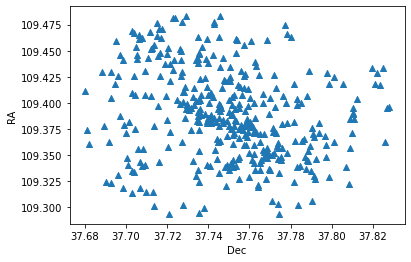

In [3]:
ra=data.field('ra')
dec=data.field('dec')
plt.plot(dec,ra,color='k', linestyle='None', )
plt.scatter(data.dec, data.ra,
marker = '^',)        
plt.xlabel('Dec')
plt.ylabel('RA')
plt.show()  

In [4]:
import causticpy
caustic= causticpy.Caustic()
cluster_data = caustic.run_caustic(np.vstack((ra[mask],dec[mask],zspec[mask])).T)

DATA SET SIZE 194
Pre_r200= 1.9014076970864013
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1422.9711601912059
Combined Vdisp= 1422.9711601912059
Calculating initial surface
complete


In [5]:
""" This gives the comoving distance and Proper distance from the observer"""
D_comov=cosmos.comoving_distance(z_cluster)
D_prop=cosmos.angular_diameter_distance(z_cluster)
D_comov,D_prop

(<Quantity 2095.99619914 Mpc>, <Quantity 1356.45322481 Mpc>)

In [6]:
good_flag = caustic.run_caustic(np.vstack((ra[mask],dec[mask],zspec[mask])).T,clus_z=0.54520345,gal_r = caustic.r, gal_v = caustic.v)

DATA SET SIZE 194
Pre_r200= 1.9014076970864013
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1422.9711601912059
Combined Vdisp= 1422.9711601912059
Calculating initial surface
complete
r200 estimate:  1.7522319397953878
M200 estimate:  2091040224997605.8


In [7]:
# cluster data from the mean of all members
dec_cl=np.mean(dec[mask])
ra_cl=np.mean(ra[mask])

# Actual separation of the of galaxies from the cluster center in degrees
d_dec = (dec[mask] - dec_cl)
d_ra = (ra[mask] - ra_cl)
theta = np.arctan2(d_dec,d_ra) 
deg = np.sqrt(d_ra ** 2 + d_dec ** 2) * np.pi/180 # in radians

# act radius by multiplying with d_prop 
act_r = D_prop * deg
Ns,rs=np.histogram(np.array(act_r))
rs

array([0.06248679, 0.28765276, 0.51281873, 0.7379847 , 0.96315067,
       1.18831664, 1.41348261, 1.63864858, 1.86381455, 2.08898052,
       2.31414649])

In [8]:
#changing ra and dec to radian
ra=data.field('ra')
dec=data.field('dec')

#for the cluster  from the cluster file
c_ra=(109.38886*np.pi/180)
c_dec=(37.75183*np.pi/180)

# For clusters members/Galaxies
c1=ra[mask]*(np.pi/180)
c2=dec[mask]*(np.pi/180)

In [9]:
"""
 Angular separation 
 Using astropy Module
"""
import astropy.units as u
from astropy.coordinates import SkyCoord
A=(SkyCoord(ra[mask]*u.degree, dec[mask]*u.degree)) #c1 refers to the galaxies coordinates
B=(SkyCoord(109.38886*u.degree,37.75183*u.degree)) #c2 refers to the co-ordinates of whole cluster
sep = A.separation(B)
x=sep.radian

In [10]:
#Comoving distance to the center of cluster
D_prop1=cosmos.angular_diameter_distance(z_cluster)
# Distance to each galaxy member
D_prop2=cosmos.angular_diameter_distance(z)

# Projected separation from the cluster center
proj_r=x*D_prop
proj_r

<Quantity [0.01210225, 0.02835029, 0.10036137, 0.10263826, 0.1145063 ,
           0.15431088, 0.16312841, 0.172     , 0.17293552, 0.19415953,
           0.19588294, 0.20445279, 0.21880792, 0.22679762, 0.22760908,
           0.2376391 , 0.24586203, 0.24981116, 0.2524638 , 0.2543026 ,
           0.26156198, 0.26310967, 0.26383184, 0.26724947, 0.27612851,
           0.28909042, 0.29350881, 0.30317959, 0.30874151, 0.31356722,
           0.31404439, 0.31841489, 0.32543268, 0.32618552, 0.35920613,
           0.35992984, 0.36593288, 0.38515151, 0.3937116 , 0.39682714,
           0.39929978, 0.40386601, 0.41264699, 0.41771622, 0.4311503 ,
           0.43578715, 0.45400456, 0.4677811 , 0.47444179, 0.48642753,
           0.49067607, 0.49086186, 0.50171388, 0.50548569, 0.5220427 ,
           0.5268731 , 0.53668103, 0.54919367, 0.55701586, 0.56000231,
           0.56052711, 0.56356606, 0.57326685, 0.59187889, 0.59376075,
           0.60906285, 0.61047858, 0.61429505, 0.62832678, 0.63757755,
      

In [11]:
# same results as above from caustic method
#caustic.r
#plt.plot(proj_r,caustic.r)

In [12]:
# Actual distance estimation according to simulation for all galaxies
# Getting the prop distance 
d_C = D_prop2
dc_mpc = (d_C).value

# Interpolation of the galaxies redshift with comoving/prop distance
dc_interpolation = interp1d(z, dc_mpc)
z_interpolation = interp1d(dc_mpc, z)

# the phi and theta between galaxy and the plane
phi   = ( ra[mask]   - 180 ) * np.pi / 180.
theta = (dec[mask] + 90 ) * np.pi / 180.

# The proper distance as a result of interpolation (rr)
rr    = dc_interpolation(z)
x1 = rr * np.cos( phi) * np.sin( theta )  # x component of the position vector
y1 = rr * np.sin( phi) * np.sin( theta )  # y component of the position vector
z1 = rr * np.cos( theta )                 # z component of the position vector

# this contains the xyz component of the postion of each galaxy 

In [13]:
#  same as above but for the cluster center
d_x = D_prop1
dx_mpc = (d_x).value

phi1   = ( ra_cl   - 180 ) * np.pi / 180.
theta1 = (dec_cl + 90 ) * np.pi / 180.
r1    = dx_mpc

x2 = r1 * np.cos( phi1) * np.sin( theta1 )
y2 = r1 * np.sin( phi1) * np.sin( theta1 )
z2 = r1 * np.cos( theta1 )

In [14]:
len(dec)

371

In [15]:
yu=np.arccos(np.sin(dec[mask])*np.sin(dec_cl) + np.cos(dec[mask])*(np.cos(dec_cl)*np.cos(dec[mask] - ra_cl)))*np.pi/180
(np.tan(yu))*D_prop


<Quantity [59.62404352, 59.64082291, 59.58533385, 59.58594649, 59.56864666,
           59.73958653, 59.78723524, 59.76548822, 59.62281318, 59.53238587,
           59.8080847 , 59.5025233 , 59.85257963, 59.41467916, 59.77868412,
           59.83184421, 59.46610136, 59.79066561, 59.63277151, 59.42705428,
           59.65998665, 59.50375479, 59.31807962, 59.52416409, 59.90361464,
           59.93322635, 59.90080638, 59.47574118, 59.37692566, 59.94579153,
           59.97118104, 59.61739298, 59.32290099, 59.34033637, 59.41164276,
           59.38510988, 59.48392665, 59.8717771 , 60.04688403, 59.45221813,
           60.06630423, 59.2117639 , 60.05631342, 59.30591597, 59.42618538,
           59.52892863, 60.04334445, 60.0702228 , 59.25185461, 60.09313008,
           59.78465061, 59.41161641, 59.05474673, 59.51984115, 59.11451154,
           59.0765997 , 59.54223645, 60.23402172, 60.15882975, 59.4593113 ,
           59.4350025 , 60.21527389, 59.9507    , 58.95918078, 59.33259461,
           5

In [17]:
dis =np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
dis

array([2.10163687e+00, 1.03172894e+01, 2.56651402e+01, 3.61856102e+00,
       5.30843835e-01, 1.75331308e+00, 7.63505498e+00, 2.49407866e+00,
       9.34353619e+00, 1.13428590e+00, 4.24196496e+00, 1.98438320e+01,
       4.49481704e+00, 7.25328607e+00, 5.49446252e+00, 7.03953275e+01,
       3.33714396e-01, 1.53598558e+01, 3.84066398e+00, 3.69917084e+01,
       1.63809942e+01, 2.00834940e+01, 1.77506712e+02, 5.06941423e+00,
       6.04696460e+00, 9.34687310e+00, 1.31118174e+01, 1.38387239e+01,
       2.35349788e+01, 7.88495127e+00, 8.01159281e-01, 1.98438362e+01,
       7.64014118e+00, 2.37724538e+01, 1.68520884e+01, 1.38326950e+01,
       5.92723377e+00, 5.25127431e+00, 5.68343309e+00, 2.15043081e+00,
       1.01561678e+01, 1.41938767e+00, 2.26855306e+01, 6.88931691e+00,
       5.01541214e+00, 1.68059301e+00, 6.25689244e+00, 3.26643918e+00,
       1.61342846e+01, 3.26891642e+00, 5.89206525e+00, 7.89199394e+00,
       2.12800823e+01, 1.44540380e+00, 1.78167514e+02, 7.65552243e+00,
      

In [18]:
bb=np.sqrt(np.sort(rr**2+r1**2-(2*rr*r1)*(np.sin(theta)*np.sin(theta1)*np.cos(phi-phi1)+np.cos(theta)*np.cos(theta1))))


In [19]:
zs=np.array(rr**2+r1**2)-(2*rr*r1)*[np.sin(theta)*np.sin(theta1)*np.cos(phi)*np.cos(phi1)+np.sin(theta)*np.sin(theta1)*np.sin(phi)*np.sin(phi1)+np.cos(theta)*np.cos(theta1)]


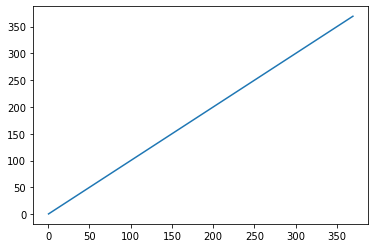

In [20]:
distance=np.sqrt(rr**2+r1**2-2*rr*r1*np.cos(theta-theta1)-2*rr*r1*np.sin(theta)*np.sin(theta1)*(np.cos(phi-phi1)-1))
plt.plot(np.sort(distance),(bb))

In [24]:

#    R=1
#    
#    x1 = R* FLRW.comoving_distance(qso.z)*math.sin(toRad(qso.DEC))*math.cos(toRad(qso.RA))
#    y1 = R* FLRW.comoving_distance(qso.z)*math.sin(toRad(qso.DEC))*math.sin(toRad(qso.RA))
#    z1 = R* FLRW.comoving_distance(qso.z)*math.cos(toRad(qso.DEC))
#    
#    x2 = R* FLRW.comoving_distance(eachCluster.z)*math.sin(toRad(eachCluster.DEC))*math.cos(toRad(eachCluster.RA))
#    y2 = R* FLRW.comoving_distance(eachCluster.z)*math.sin(toRad(eachCluster.DEC))*math.sin(toRad(eachCluster.RA))
#    z2 = R* FLRW.comoving_distance(eachCluster.z)*math.cos(toRad(eachCluster.DEC))    
#    
#    dis = math.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
#    return dis

ra1 = ra[mask]
ra2 = c_ra
dec1 = dec[mask]   
dec2 = c_dec

radiff  = ra2-ra1
angle1 = np.arctan2(np.sin(radiff),np.cos(dec1)*np.tan(dec2)-np.sin(dec1)*np.cos(radiff))
angle1*(np.pi/180)

array([-0.01223208, -0.01221411, -0.01229676, -0.01218501, -0.01218669,
       -0.01212579, -0.01213697, -0.01223909, -0.01232531, -0.01236217,
       -0.01221712, -0.01216884, -0.01211121, -0.01238591, -0.01227179,
       -0.01207388, -0.01216495, -0.01227873, -0.01208078, -0.01218694,
       -0.01235943, -0.01213101, -0.0123011 , -0.01211758, -0.01206765,
       -0.01207838, -0.01204379, -0.01212182, -0.01218529, -0.01204799,
       -0.01211391, -0.01240744, -0.0124514 , -0.01220226, -0.01212473,
       -0.01248053, -0.0124711 , -0.0123144 , -0.01213652, -0.01207633,
       -0.01209376, -0.01249132, -0.01199608, -0.01215865, -0.01206937,
       -0.01201425, -0.01222217, -0.01220639, -0.01215828, -0.01219981,
       -0.01189975, -0.01255633, -0.0125113 , -0.01253952, -0.01257479,
       -0.01228456, -0.01254986, -0.01197921, -0.01187555, -0.01197183,
       -0.01198374, -0.01212995, -0.01238486, -0.01236919, -0.01201961,
       -0.01255351, -0.01252509, -0.01213102, -0.01253365, -0.01

In [25]:
caustic.r

array([0.05128033, 0.06775581, 0.07158301, 0.16282267, 0.17579602,
       0.17868873, 0.16375537, 0.11527804, 0.12192887, 0.16384723,
       0.14484227, 0.26651224, 0.21182926, 0.22519906, 0.16632927,
       0.25082065, 0.30800658, 0.18829807, 0.30528853, 0.31596313,
       0.20541854, 0.32444948, 0.31143141, 0.32775877, 0.27400837,
       0.27714316, 0.29953629, 0.36479114, 0.37007568, 0.30926809,
       0.28391354, 0.26681883, 0.32260467, 0.38653522, 0.42130897,
       0.33800794, 0.3286753 , 0.32324954, 0.35139635, 0.45802175,
       0.36545478, 0.40929945, 0.40462136, 0.47930784, 0.49258263,
       0.49405246, 0.39846193, 0.41373159, 0.53577265, 0.43289984,
       0.53339513, 0.45542038, 0.52160965, 0.46004265, 0.52247561,
       0.58139802, 0.48914751, 0.52592114, 0.55970989, 0.61952844,
       0.62066859, 0.51641119, 0.51112316, 0.64003999, 0.65546222,
       0.55532566, 0.55361132, 0.56601495, 0.57146818, 0.59265407,
       0.69002548, 0.59076266, 0.66340649, 0.59116467, 0.70488

In [26]:
np.histogram(r[mask])

(array([11, 28, 24, 29, 32, 24, 24, 26, 12, 22]),
 array([0.00814648, 0.13607198, 0.26399747, 0.39192298, 0.51984847,
        0.647774  , 0.77569944, 0.90362495, 1.0315504 , 1.1594759 ,
        1.2874014 ], dtype=float32))

In [27]:
r_act=r[mask]
N,r_3d=np.histogram(r_act)
##n=N/(np.pi*(( rout[1:]**2-rout[:-1]**2)))
#n 
N

array([11, 28, 24, 29, 32, 24, 24, 26, 12, 22])

array([85.20972741, 78.16058601, 40.85938154, 35.5164093 , 30.6024602 ,
       18.82631801, 15.9579272 , 15.00203418,  6.11545401, 10.0393109 ])

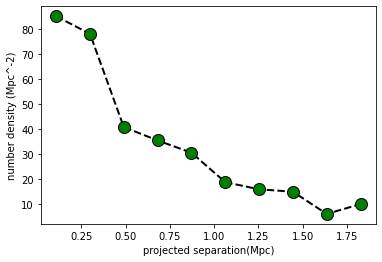

In [28]:
#act_N,rs=np.histogram(r[mask])
N,R=np.histogram(np.array(proj_r))

#Getting the number density profile in 2D 
n=N/(np.pi*(( R[1:]**2-R[:-1]**2)))

# central point of each separation 
R_proj = (R[1:] + R[:-1])/2
plt.plot(R_proj,n, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('projected separation(Mpc)')
plt.ylabel('number density (Mpc^-2)')  
plt.show()
n

In [29]:
R_proj = (R[1:] + R[:-1])/2

In [30]:
rs

array([0.06248679, 0.28765276, 0.51281873, 0.7379847 , 0.96315067,
       1.18831664, 1.41348261, 1.63864858, 1.86381455, 2.08898052,
       2.31414649])

In [31]:
""" the derivative of number density / the slop of the function n
 """
#dndr=np.array(np.gradient(n)/np.gradient(R_proj))
#dndr

' the derivative of number density / the slop of the function n\n '

In [32]:
dndR=np.array(np.gradient(n,R_proj))
dndR.shape

(10,)

In [33]:
R_proj

array([0.10758698, 0.29855644, 0.4895259 , 0.68049535, 0.87146481,
       1.06243427, 1.25340372, 1.44437318, 1.63534264, 1.8263121 ])

In [34]:
np.array(R_proj).shape

(10,)

In [35]:
 #? np.hstack

In [36]:
interp1d(np.array(R_proj),np.array(dndR))

In [37]:
xx=np.hstack((np.array([0]),np.array(R_proj)))
xx

array([0.        , 0.10758698, 0.29855644, 0.4895259 , 0.68049535,
       0.87146481, 1.06243427, 1.25340372, 1.44437318, 1.63534264,
       1.8263121 ])

In [38]:
yy=np.hstack((np.array(dndR[0]),np.array(dndR)))
yy

array([ -36.9124022 ,  -36.9124022 , -116.11895059, -111.65182483,
        -26.85487383,  -43.69832631,  -38.34260523,  -10.01281538,
        -25.76975749,  -12.99349998,   20.54703909])

In [39]:
yy

array([ -36.9124022 ,  -36.9124022 , -116.11895059, -111.65182483,
        -26.85487383,  -43.69832631,  -38.34260523,  -10.01281538,
        -25.76975749,  -12.99349998,   20.54703909])

In [40]:
#inter1=interp1d(xx,yy)

In [41]:
inter1=interp1d(xx, yy, bounds_error=False, fill_value=-10.)

In [42]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[0], 1.82,args=(rs[0]))[0]


71.53573064718636

In [43]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[1], 1.82,args=(rs[1]))[0]


58.14951950064835

In [44]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[2], 1.82,args=(rs[2]))[0]


29.1071057053129

In [45]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[3], 1.82,args=(rs[3]))[0]


14.304156911300737

In [46]:
def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[4], 1.82,args=(rs[4]))[0]


10.280384249129977

In [47]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[7], 1.82,args=(rs[7]))[0]


0.27783498176667776

In [48]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[5], 1.82,args=(rs[5]))[0]


4.543345901215525

In [49]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[7], 1.82,args=(rs[7]))[0]


0.27783498176667776

In [50]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[8], 1.89,args=(rs[8]))[0]


0.5329502489875821

In [51]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

nu_all=[integrate.quad(nu, rs_i, 1.82,args=(rs_i))[0] for rs_i in rs]
nu_all

[71.53573064718636,
 58.14951950064835,
 29.1071057053129,
 14.304156911300737,
 10.280384249129977,
 4.543345901215525,
 3.6951743208768253,
 0.27783498176667776,
 nan,
 nan,
 nan]

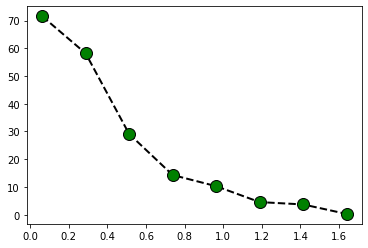

In [52]:
plt.plot(rs,nu_all, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)

In [53]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[0], 1.82,args=(rs[0]))[0]


71.53573064718636

In [54]:
rs

array([0.06248679, 0.28765276, 0.51281873, 0.7379847 , 0.96315067,
       1.18831664, 1.41348261, 1.63864858, 1.86381455, 2.08898052,
       2.31414649])

In [55]:
z_mask=zspec[mask]

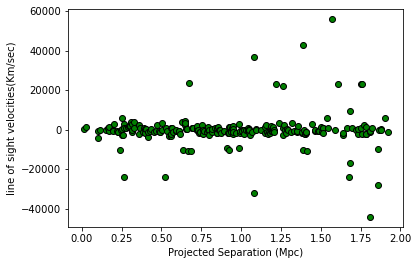

In [56]:
# Peculiar velocities of a members from there spectrosocpic
# redshift and mean redshift of a cluster
#%matplotlib
c = const.c.to("km/s")

def v_los(z_mask, z_cl=0.54520345):
    return (c * z_mask - c * z_cl) / (1 + z_cl)
los_v =np.array(v_los(z_mask)) 

#Plot
#Plotting velocity of line of sights for all the candidates

plt.plot(proj_r,los_v , color='black', linestyle='None', linewidth = 1, marker='.',
         markerfacecolor='green', markersize=12)
plt.xlabel('Projected Separation (Mpc)')
plt.ylabel('line of sight velocities(Km/sec)')
plt.show()


In [57]:
val= biweight_scale(los_v, 9)
val_err = 0.92 * val / (np.sqrt(los_v.size - 1))
val,val_err


(1790.1090210650664, 108.35808434067306)

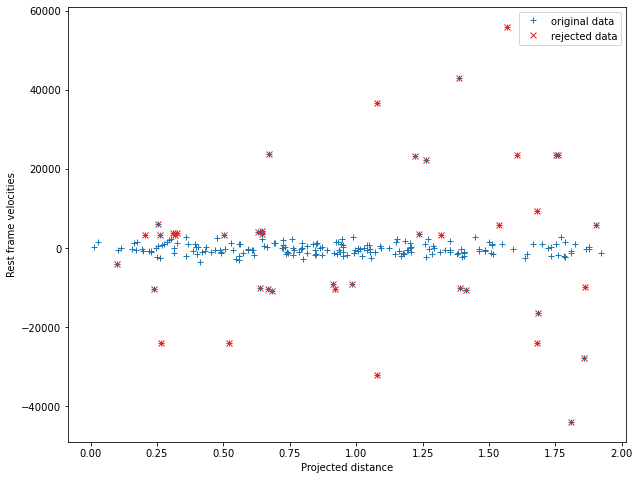

In [58]:
import scipy.stats as stats
from astropy.stats import sigma_clip
filtered_data = sigma_clip(los_v, sigma=2.5, maxiters=10000)

#clipped=sigma_clipped_stats(los_v, sigma=3, maxiters=1000)


# plot the original and rejected data
plt.figure(figsize=(10,8))

plt.plot(proj_r,los_v, '+', color='#1f77b4', label="original data")
plt.plot(proj_r[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.xlabel('Projected distance')
plt.ylabel('Rest frame velocities')
plt.legend(loc=1, numpoints=1)


In [59]:
(filtered_data.data[filtered_data.mask])

array([ -3919.771 ,   3161.7803, -10341.65  ,   5994.397 ,   3200.5798,
       -23980.898 ,   3763.2283,   3161.7803,   3802.0378,   3394.5974,
       -24058.502 ,   4034.845 , -10031.233 ,   4287.077 ,   3414.0022,
       -10458.068 ,  23824.361 , -10768.485 ,  -9099.965 , -10322.245 ,
        -9216.363 , -32013.12  ,  36745.758 ,  23358.736 ,   3530.401 ,
        22349.848 ,   3316.9985,  42993.035 , -10089.438 , -10516.273 ,
         5800.389 ,  55933.836 ,  23436.336 , -24058.502 ,   9409.057 ,
       -16511.326 ,  23416.93  ,  23416.93  , -43983.832 , -27686.584 ,
        -9798.406 ,   5897.393 ], dtype=float32)

(array([ 3.,  8., 18., 31., 34., 38., 21., 21.,  7.,  9.]),
 array([-3473.5312 , -2839.1023 , -2204.6733 , -1570.2443 ,  -935.81525,
         -301.38623,   333.0428 ,   967.4718 ,  1601.9008 ,  2236.3298 ,
         2870.7588 ], dtype=float32),
 <BarContainer object of 10 artists>)

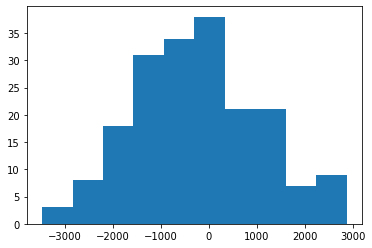

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(filtered_data)


In [61]:
val= biweight_scale(filtered_data, 9)
val_err = 0.92 * val / (np.sqrt(filtered_data.size - 1))
val,val_err


(1344.231631102274, 81.3684321694094)

In [62]:
vv=np.array([1286,1048,1225,1250,1129,1181,1134,1358])

# 3-Sigma clipped velocities analysis

In [63]:
""" 
    The  r200/virial radius of the cluster determined using
    the velocity dispersion of the cluster
+
"""

from astLib import astCoords as aco
from astLib import astStats as ast
from astLib import astCalc as aca


# aardvark simulation cosmology
aca.H0 = 100
aca.OMEGA_M0 = 0.23
aca.OMEGA_L0 = 0.77

vd= 1235.1418404862216#1480.6518927150462 km/s
# getting r200 using Saro 2013 

r200 = np.sqrt(3)* vd /(10*aca.H0 * aca.Ez(0.54520345))
r200

1.6813163898968162

In [64]:
np.mean(zspec[mask])

0.54520345

In [65]:
from astropy.constants import M_sun
    #evaluate cluster mass
vel_disp=9.13e5 # 913 kms                                     1490 Km/sec^-1  the biweight estimates
radius=3.394e22    # 1.1 Mpc    # maximum distance from the cluster's centre
M=-(vel_disp**2)*radius/(const.G)*5.0279e-31*(-4.494567052739397) #converted into solar masses unless the unit remains the sane
M

<Quantity 9.57904392e+14 kg s2 / m3>

In [66]:
import causticpy
caustic= causticpy.Caustic()
cluster_data = caustic.run_caustic(np.vstack((ra[mask],dec[mask],zspec[mask])).T)

DATA SET SIZE 194
Pre_r200= 1.9014076970864013
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1422.9711601912059
Combined Vdisp= 1422.9711601912059
Calculating initial surface
complete


In [67]:
caustic.run_caustic(np.vstack((ra[mask],dec[mask],zspec[mask])).T)

DATA SET SIZE 194
Pre_r200= 1.9014076970864013
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1422.9711601912059
Combined Vdisp= 1422.9711601912059
Calculating initial surface
complete


1

In [68]:
np.mean(zspec[mask])

0.54520345

In [69]:
good_flag = caustic.run_caustic(np.vstack((ra[mask],dec[mask],zspec[mask])).T,clus_z=0.54520345,gal_r = np.array(caustic.r), gal_v = np.array((los_v)))

DATA SET SIZE 194
Pre_r200= 1.9002550930451485
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1421.9867879378185
Combined Vdisp= 1421.9867879378185
Calculating initial surface
complete
r200 estimate:  1.7536386470752543
M200 estimate:  2095915829303498.2


In [70]:
caustic.vdisp_gal,caustic.M200_est,caustic.r200_est

(1283.3068749866507, array(2.16998601e+15), array(1.77439012))

In [71]:
caustic.r200_est

array(1.77439012)

<function matplotlib.pyplot.show(close=None, block=None)>

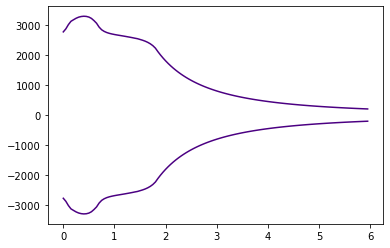

In [72]:
caustic_profile=caustic.caustic_profile
caustic_radii=caustic.x_range
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')  # assumes caustic
plt.show

In [73]:
from  scipy.integrate import dblquad

def func(u2, u3, gamma):
    return (1-1/(1+gamma-u3-u2))*(1/(1+u2)**2)*(1/(1+u3)**2)


gamma = 10

def gfun(u3):
    return 0

def hfun(u3):
    return gamma-u3

dblquad(func, 0, gamma, gfun, hfun, args=(gamma,))


(0.6783567969466753, 1.1890426686018382e-08)

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

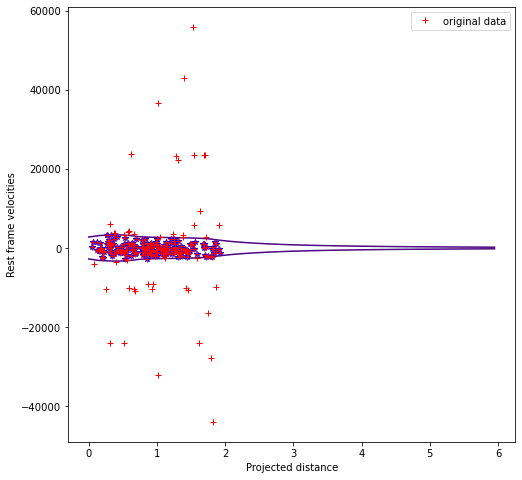

In [74]:
#%matplotlib notebook
projected_radius=np.array(caustic.r)
peculiar_velocity=np.array(los_v)
cluster_redshift=np.mean(zspec[mask])
cluster_RA=np.mean(ra[mask])
cluster_DEC=np.mean(dec[mask])
#dispersion_velocity=1410
caustic_profile=caustic.caustic_profile

caustic_mask = np.array([x==1 for x in caustic.memflag])
cut_radius = np.transpose(caustic.data_set)[0]
cut_velocity = np.transpose(caustic.data_set)[1]
cut_RA = np.transpose(caustic.data_set)[2]
cut_DEC = np.transpose(caustic.data_set)[3]
cut_z = np.transpose(caustic.data_set)[4]
trimmed_radius = cut_radius[caustic_mask]
trimmed_velocity = cut_velocity[caustic_mask]

# plot the original and rejected data
plt.figure(figsize=(8,8))

plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')
plt.plot(trimmed_radius,trimmed_velocity,'*',color='blue',)
plt.plot(caustic.r,los_v, '+', color='red', label="original data")



#plt.plot(p[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.xlabel('Projected distance')
plt.ylabel('Rest frame velocities')
plt.legend(loc=1, numpoints=1)
plt.imshow


No handles with labels found to put in legend.


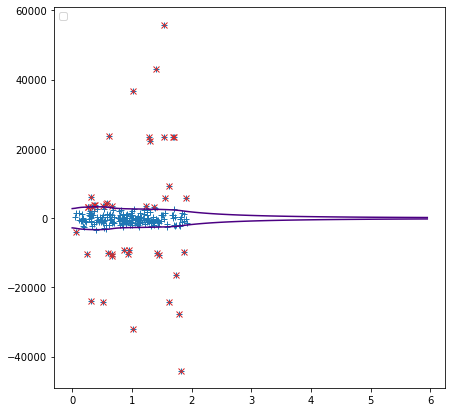

In [75]:
import scipy.stats as stats

#c = stats.bernoulli.rvs(200, size=p.shape)
#los_v += (np.random.normal(0., 100, p.shape) +  c*np.random.normal(1000, 6000, p.shape))

from astropy.stats import sigma_clip
#filtered_data = sigma_clip(y, sigma=3, maxiters=10)

clipped_velocities = sigma_clip(los_v, sigma=2.7, maxiters=10000)
# plot the original and rejected data
plt.figure(figsize=(7,7))
plt.plot(caustic.r,los_v, '+', color='#1f77b4')
plt.plot(caustic.r[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728')
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')

plt.legend(loc=2, numpoints=1)

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

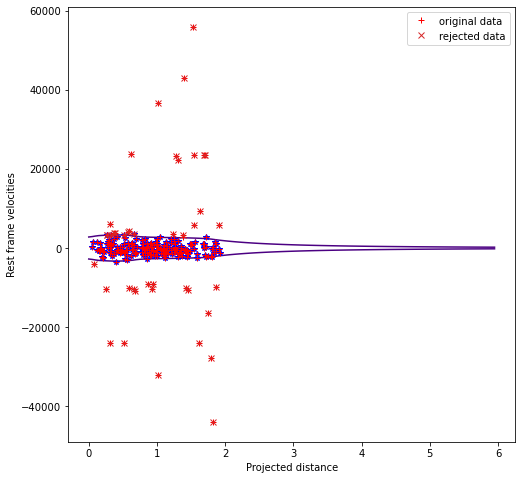

In [76]:
# plot the original and rejected data
plt.figure(figsize=(8,8))
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')
plt.plot(cut_radius,cut_velocity,'*',color='blue',)
plt.plot(caustic.r,los_v, '+', color='red', label="original data")
plt.plot(caustic.r[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.xlabel('Projected distance')
plt.ylabel('Rest frame velocities')
plt.legend(loc=1, numpoints=1)
plt.imshow


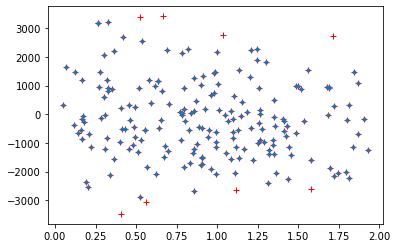

In [77]:
plt.plot(cut_radius, cut_velocity, '+', color='red')
plt.plot(cut_radius[caustic_mask], cut_velocity[caustic_mask], '.')


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

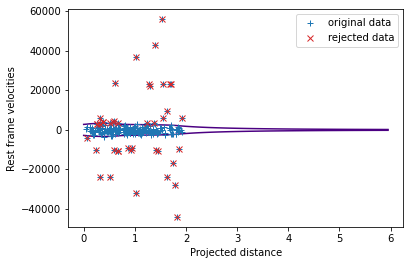

In [78]:
# plot the original and rejected data


#%matplotlib inline# Caustic envelope
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')
# plot the original and rejected data

plt.plot(caustic.r,los_v, '+', color='#1f77b4', label="original data")
plt.plot(caustic.r[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.xlabel('Projected distance')
plt.ylabel('Rest frame velocities')
plt.legend(loc=1, numpoints=1)
plt.imshow

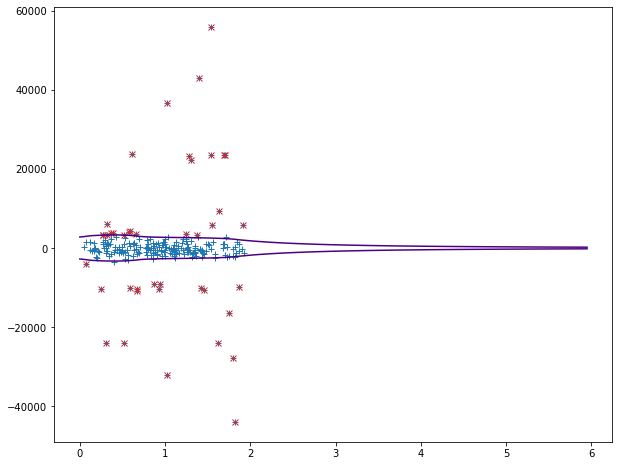

In [79]:
import scipy.stats as stats
from astropy.stats import sigma_clip
clipped_data = sigma_clip(los_v, sigma=2.3, maxiters=1000000)

#clipped=sigma_clipped_stats(los_v, sigma=3, maxiters=1000)


# plot the original and rejected data
plt.figure(figsize=(10,8))

plt.plot(caustic.r,los_v, '+', color='#1f77b4', label="original data")
plt.plot(caustic.r[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')

In [80]:
len(trimmed_velocity)

186

(array([ 5., 17., 29., 36., 33., 17., 26., 10.,  9.,  4.]),
 array([-2872.08325195, -2264.81694336, -1657.55063477, -1050.28432617,
         -443.01801758,   164.24829102,   771.51459961,  1378.7809082 ,
         1986.0472168 ,  2593.31352539,  3200.57983398]),
 <BarContainer object of 10 artists>)

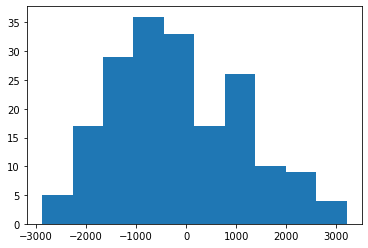

In [81]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(trimmed_velocity)


In [82]:
def zdistance(clus_z,H0=100.0):
        """
        Finds the angular diameter distance for an array of cluster center redshifts.
        Instead, use angular distance file precalculated and upload.
        """
        cosmo = {'omega_M_0':0.25,'omega_lambda_0':0.75,'h':H0/100.0}
        cosmo = cd.set_omega_k_0(cosmo)
        ang_d = cd.angular_diameter_distance(clus_z,**cosmo)
        lum_d = cd.luminosity_distance(clus_z,**cosmo)
        return ang_d,lum_d


In [83]:
cosmo

NameError: name 'cosmo' is not defined

In [ ]:
caustic.ang_d

In [ ]:
c_ra=np.mean(ra[mask])
c_dec=np.mean(dec[mask])

In [ ]:
angularSep = np.arccos(np.sin(dec[mask])*np.sin(c_dec)  +  np.cos(dec[mask]) *np.cos(c_dec)*np.cos(ra[mask]-c_ra))
angularSep*np.pi/180

In [ ]:

#    R=1
#    
#    x1 = R* FLRW.comoving_distance(qso.z)*math.sin(toRad(qso.DEC))*math.cos(toRad(qso.RA))
#    y1 = R* FLRW.comoving_distance(qso.z)*math.sin(toRad(qso.DEC))*math.sin(toRad(qso.RA))
#    z1 = R* FLRW.comoving_distance(qso.z)*math.cos(toRad(qso.DEC))
#    
#    x2 = R* FLRW.comoving_distance(eachCluster.z)*math.sin(toRad(eachCluster.DEC))*math.cos(toRad(eachCluster.RA))
#    y2 = R* FLRW.comoving_distance(eachCluster.z)*math.sin(toRad(eachCluster.DEC))*math.sin(toRad(eachCluster.RA))
#    z2 = R* FLRW.comoving_distance(eachCluster.z)*math.cos(toRad(eachCluster.DEC))    
#    
#    dis = math.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
#    return dis

In [ ]:
def RDZtoXYZ(r,d,rs):


    #convert inputs to floats
    rs = float(rs)    
    d = float(d)
    r = float(r)


    #constants
    H_0 = 67.80;
    SpeedOfLight = 2.997e5 #km/s
    
    #calculations
    v_here = (SpeedOfLight*((1+rs)**2 - 1))/(1+(1+rs)**2)
    dis = (v_here)/(H_0)    #TODO: take into account cosmological redshift
                            #TODO: take into account FRW Metric

    #coordinate transformation
    x = dis*math.sin(toRad(d))*math.cos(toRad(r))
    y = dis*math.sin(toRad(d))*math.sin(toRad(r))
    z = dis*math.cos(toRad(d))
    return [x,y,z]
caustic.v/67.77

In [84]:
#print angle
    if angle < 0:
        angle = angle+360
    return angle

IndentationError: unexpected indent (2040199045.py, line 2)

In [ ]:
caustic.img_tot

In [ ]:
caustic.caustic_profile

In [ ]:
caustic.memflag[True]

In [ ]:
caustic.vdisp_gal

In [ ]:
#calculate H(z)
        self.Hz = H0*np.sqrt(0.25*(1+z)**3 + 0.75)
        self.hz = self.Hz / 100.0  #little h(z)

In [ ]:
self.r =angle*ang_d

In [ ]:
caustic.r

In [ ]:
caustic.v

In [ ]:
r[mask]

In [ ]:
plt.plot(caustic.r,r[mask], color='black', linestyle='none', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.show()